# Задание 2

## Генерирование обучающих и тестовых выборок

Реализовать генератор выборок $\{x^{(i)}, y^{(i)}\}_{i=1}^{N}$, $x=(x_1, x_2) \in \mathbb{R}^2$, $y \in {0, 1}$ с распределениями, соответствующими 4 типам, представленным на [странице](https://playground.tensorflow.org/).
Смоделировать ошибку для $x=(x_1, x_2)$
Подобрать на `playground.tensorflow` для таких выборок архитектуру и параметры нейронной сети, параметры выборки и градиентного спуска, при которых достигается переобучение.

## Реализация элементарного перцептрона

Реализовать классификатор с помощью:

+ элементарного перцептрона
+ ансамбля элементарных перцептронов

В качестве функции активации использовать:

+ ступенчатую функцию
+ сигмоиду

В первом случае для обучения на выборках из предыдущего задания использовать алгоритм из теоремы о сходимости элементарного перцептрона, ао втором - градиентный спуск с обратным распространением ошибки.

+ Построить вычислительный граф элементарного перцептрона с выбранной функцией активации и произвести расчет локальных производных в ходе обратного распространения ошибки
+ Представить результаты в виде матрицы ошибок (confusion matrix)
+ Сравнить время обучения и качество классификации для полученных моделей   

## Примеры переобучения нейронной сети:

<img alt="one-circle" src="./assets/one-circle.png" width="1000" />
<br />
<img alt="two-circles" src="./assets/two-circles.png" width="1000" />
<br />
<img alt="quarters" src="./assets/quarters.png" width="1000" />
<br />
<img alt="spirale" src="./assets/spirale.png" width="1000" />

## Генерирование обучающих и тестовых выборок

+ Реализовать функцию для генерации выборки "центр-края":

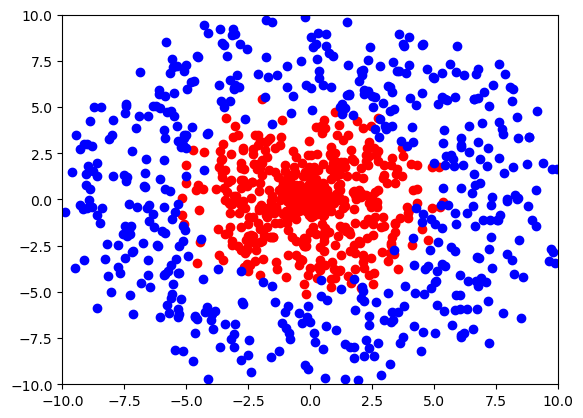

In [27]:
import numpy as np
import matplotlib.pyplot as plt


def center_edge_sampling(n, radius, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    x1[:, 0] = np.random.uniform(0, radius / 2, half_n) + np.random.uniform(-eps, eps, half_n)
    x1[:, 1] = np.random.uniform(0, 2 * np.pi, half_n)

    x2 = np.zeros((half_n, 2))
    x2[:, 0] = np.random.uniform(radius / 2, radius, half_n) + np.random.uniform(-eps, eps, half_n)
    x2[:, 1] = np.random.uniform(0, 2 * np.pi, half_n)

    return x1, x2


# Пример
r_phi_1, r_phi_2 = center_edge_sampling(1000, 10, 1)

x1 = np.zeros((500, 2))
x1[:, 0] = r_phi_1[:, 0] * np.cos(r_phi_1[:, 1])
x1[:, 1] = r_phi_1[:, 0] * np.sin(r_phi_1[:, 1])

x2 = np.zeros((500, 2))
x2[:, 0] = r_phi_2[:, 0] * np.cos(r_phi_2[:, 1])
x2[:, 1] = r_phi_2[:, 0] * np.sin(r_phi_2[:, 1])

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

+ Реализовать функцию для генерации выборки "четверти":


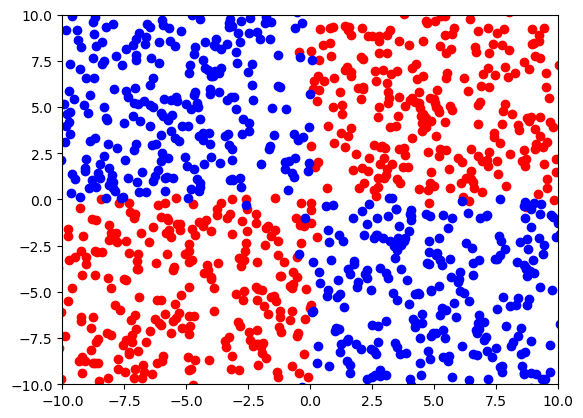

In [28]:
def quarters_sampling(n, length, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    x1[:, 0] = np.concatenate((np.random.uniform(0, length, half_n // 2),
                               np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(
        -eps, eps, half_n)
    x1[:, 1] = np.concatenate((np.random.uniform(0, length, half_n // 2),
                               np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(
        -eps, eps, half_n)

    x2 = np.zeros((half_n, 2))
    x2[:, 0] = np.concatenate((np.random.uniform(0, length, half_n // 2),
                               np.random.uniform(-length, 0, half_n // 2))) + np.random.uniform(
        -eps, eps, half_n)
    x2[:, 1] = np.concatenate((np.random.uniform(-length, 0, half_n // 2),
                               np.random.uniform(0, length, half_n // 2))) + np.random.uniform(-eps,
                                                                                               eps,
                                                                                               half_n)

    return x1, x2


# Пример
x1, x2 = quarters_sampling(1000, 10, 0.5)

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

+ Реализовать функцию для генерации выборки "диагональ":


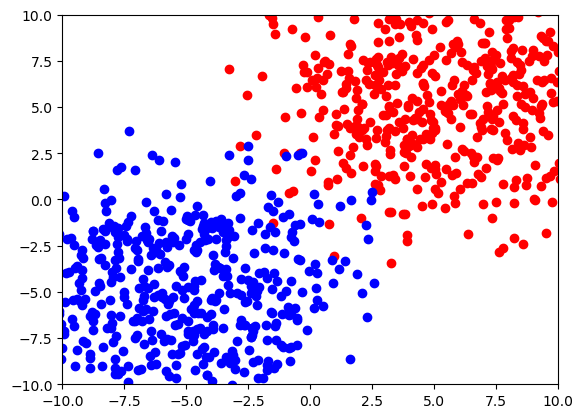

In [29]:
def two_circles_sampling(n, length, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r1 = np.random.uniform(0, length // 2, half_n)
    phi1 = np.random.uniform(0, 2 * np.pi, half_n)
    x1[:, 0] = r1 * np.cos(phi1) + np.random.uniform(-eps, eps, half_n) + length // 2
    x1[:, 1] = r1 * np.sin(phi1) + np.random.uniform(-eps, eps, half_n) + length // 2

    x2 = np.zeros((half_n, 2))
    r2 = np.random.uniform(0, length // 2, half_n)
    phi2 = np.random.uniform(0, 2 * np.pi, half_n)
    x2[:, 0] = r2 * np.cos(phi2) + np.random.uniform(-eps, eps, half_n) - length // 2
    x2[:, 1] = r2 * np.sin(phi2) + np.random.uniform(-eps, eps, half_n) - length // 2

    return x1, x2


# Пример
x1, x2 = two_circles_sampling(1000, 10, 4.5)

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

+ Реализовать функцию для генерации выборки "спираль":

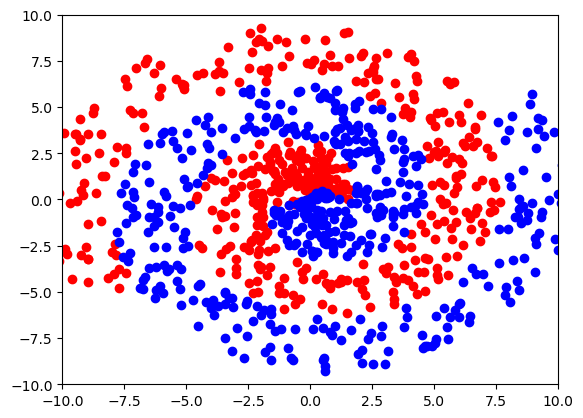

In [30]:
def spirale_sampling(n, radius, eps=0):
    half_n = n // 2

    x1 = np.zeros((half_n, 2))
    r = np.random.uniform(0, radius / 2, half_n)
    x1[:, 0] = r + np.random.uniform(-eps, eps, half_n)
    x1[:, 1] = r

    x2 = np.zeros((half_n, 2))
    r = np.random.uniform(0, radius / 2, half_n)
    x2[:, 0] = r + np.random.uniform(-eps, eps, half_n)
    x2[:, 1] = r + np.pi

    return x1, x2


# Пример
r_phi_1, r_phi_2 = spirale_sampling(1000, 20, 1.5)

x1 = np.zeros((500, 2))
x1[:, 0] = r_phi_1[:, 0] * np.cos(r_phi_1[:, 1])
x1[:, 1] = r_phi_1[:, 0] * np.sin(r_phi_1[:, 1])

x2 = np.zeros((500, 2))
x2[:, 0] = r_phi_2[:, 0] * np.cos(r_phi_2[:, 1])
x2[:, 1] = r_phi_2[:, 0] * np.sin(r_phi_2[:, 1])

plt.scatter(x1[:, 0], x1[:, 1], color='red')
plt.scatter(x2[:, 0], x2[:, 1], color='blue')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## Реализация элементарного перцептрона

+ Создал класс перцептрона:

In [31]:
def step_func_forward(t):
    return 1.0 if t >= 0.0 else 0.0


def step_func_backward(t):
    return 0.0


def sigmoid_forward(t):
    return 1.0 / (1.0 + np.exp(-t))


def sigmoid_backward(t):
    return sigmoid_forward(t) * (1 - sigmoid_forward(t))


class Model:
    def fit(self, x, y, epochs=10):
        pass

    def predict(self, x):
        pass


class Perceptron(Model):
    def __init__(self, input_size, learning_rate, activation='sigmoid', method='theorem'):
        if activation not in ['step', 'sigmoid']:
            raise ValueError("Activation must be 'step' or 'sigmoid'")
        if method not in ['gradient', 'theorem']:
            raise ValueError("Method must be 'gradient' or 'theorem'")

        self.w = np.zeros(input_size)
        self.w0 = 0
        self.learning_rate = learning_rate
        self.activation_forward = step_func_forward if activation == 'step' else sigmoid_forward
        self.activation_backward = step_func_backward if activation == 'step' else sigmoid_backward
        self.method = method

    def fit(self, x, y, epochs=10):
        for _ in np.arange(0, epochs):
            for i in range(x.shape[0]):
                linear_comb = np.dot(x[i], self.w) + self.w0
                prediction = self.activation_forward(linear_comb)
                error = y[i] - (self.activation_backward(
                    linear_comb) if self.method == 'gradient' else prediction)
                self.w += self.learning_rate * error * x[i]
                self.w0 += self.learning_rate * error

    def predict(self, x):
        prediction = self.activation_forward(np.dot(x, self.w) + self.w0)
        return prediction

### Вычислительные графы

+ Для обучения по теореме
<img alt="theorem-perceptron" src="./assets/theorem-perceptron.png" width="1000" />

+ Для обучение градиентным спуском
<img alt="gradient-descent-perceptron" src="./assets/gradient-descent-perceptron.png" width="1000" />

+ Создал класс ансамбля перцептронов

In [32]:
class Ensemble(Model):
    def __init__(self, models: [Model]):
        self.models = models

    def fit(self, x, y, epochs=10):
        x_parts = np.array_split(x, len(self.models))
        y_parts = np.array_split(y, len(self.models))
        for i in range(len(self.models)):
            x_train = np.concatenate([part for j, part in enumerate(x_parts) if j != i])
            y_train = np.concatenate([part for j, part in enumerate(y_parts) if j != i])
            self.models[i].fit(x_train, y_train, epochs)

    def predict(self, x):
        predictions = [model.predict(x) for model in self.models]
        return np.average(predictions)

### Ансамблевый алгоритм

+ Бэггинг
<img alt="perceptron-ensemble-bagging" src="./assets/perceptron-ensemble-bagging.png" width="1000" />

+ Добавил функцию для обучения, тестирования и вывода метрик:

In [33]:
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix


def fit_check_metrics(model: Model, x_train, x_test, y_train, y_test):
    # Обучение
    start_time = time()
    model.fit(x_train, y_train)
    end_time = time()

    # Проверка
    y_pred = np.zeros(len(y_test))
    for i in range(len(y_test)):
        y_pred[i] = round(model.predict(x_test[i]))

    # Вывод метрик
    accuracy = accuracy_score(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'Fit time: {end_time - start_time} seconds')
    ConfusionMatrixDisplay(matrix, display_labels=[0, 1]).plot(
        include_values=True, cmap='Blues')
    plt.show()

## Тестирование

+ Обучение **перцептрона** по **теореме** со **ступенчатой функцией** активации на выборке **"2 круга"**:

Accuracy: 0.976
Fit time: 0.05989813804626465 seconds


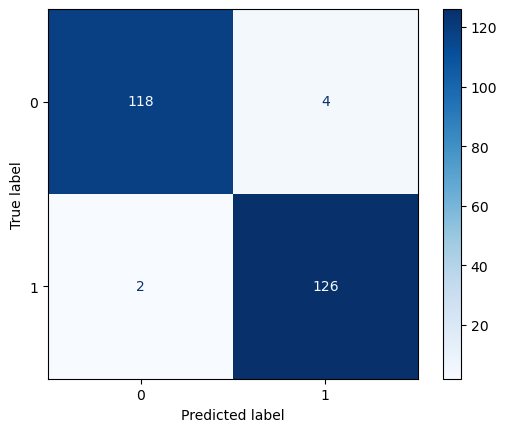

In [34]:
# Генерация выборки
N = 1000
x1, x2 = two_circles_sampling(N, 10, 5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Создание перцептрона
perceptron = Perceptron(np.size(x_train, 1), 0.01, 'step', 'theorem')

fit_check_metrics(perceptron, x_train, x_test, y_train, y_test)

+ Обучение **перцептрона** при помощи **градиентного спуска** со **сигмоидой** в качестве функции активации на выборке **"2 круга"**:

Accuracy: 0.924
Fit time: 0.08537912368774414 seconds


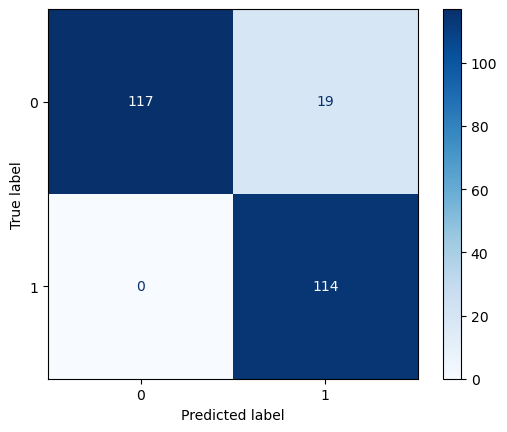

In [35]:
# Генерация выборки
N = 1000
x1, x2 = two_circles_sampling(N, 2, 1)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Создание перцептрона
perceptron = Perceptron(np.size(x_train, 1), 0.01, 'sigmoid', 'gradient')

fit_check_metrics(perceptron, x_train, x_test, y_train, y_test)

+ Обучение **ансамбля перцептронов** на выборке **"2 круга"**:

Accuracy: 0.956
Fit time: 0.5838961601257324 seconds


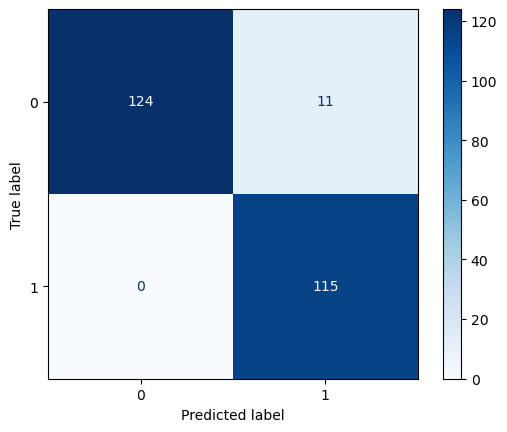

In [36]:
# Генерация выборки
N = 1000
x1, x2 = two_circles_sampling(N, 2, 1)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Создание перцептрона
perceptrons = [Perceptron(np.size(x_train, 1), 0.01, 'sigmoid', 'gradient') for _ in range(5)]
perceptrons += [Perceptron(np.size(x_train, 1), 0.01, 'step', 'theorem') for _ in range(5)]
ensemble = Ensemble(perceptrons)

fit_check_metrics(ensemble, x_train, x_test, y_train, y_test)

## Обучение на различных выборках

+ Обучение перцептрона по **теореме** со **сигмоидой** в качестве функции активации на выборке **"Четверти"**:

Accuracy: 0.948
Fit time: 0.07769560813903809 seconds


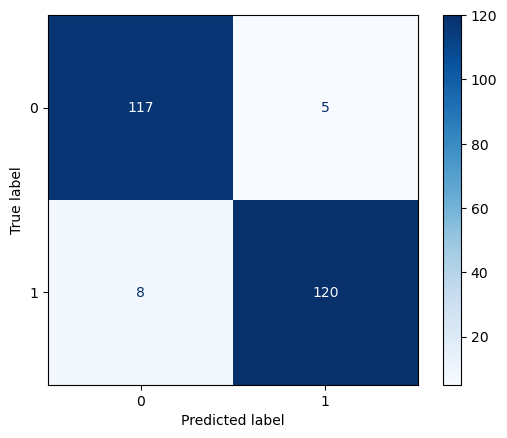

In [37]:
# Генерация выборки
N = 1000
x1, x2 = quarters_sampling(N, 10, 1)
temp_x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Использую координаты X*Y
x = np.prod(temp_x, axis=1).reshape(-1, 1)

# Разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Создание перцептрона
perceptron = Perceptron(np.size(x_train, 1), 0.01, 'sigmoid', 'theorem')

fit_check_metrics(perceptron, x_train, x_test, y_train, y_test)

+ Обучение перцептрона по **теореме** со **сигмоидой** в качестве функции активации на выборке **"Центр-Края"**:

Accuracy: 0.924
Fit time: 0.07860755920410156 seconds


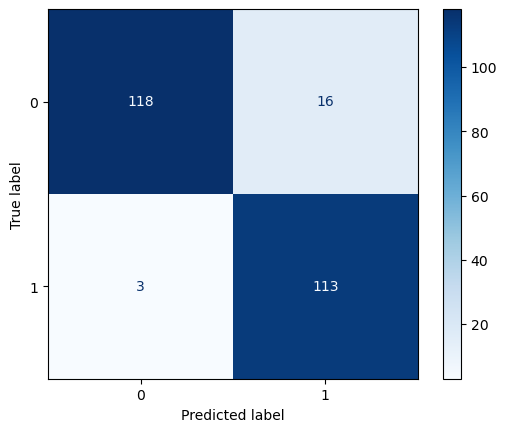

In [38]:
# Генерация выборки
N = 1000
x1, x2 = center_edge_sampling(N, 10, 1)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Создание перцептрона
perceptron = Perceptron(np.size(x_train, 1), 0.01, 'sigmoid', 'theorem')

fit_check_metrics(perceptron, x_train, x_test, y_train, y_test)

+ Обучение перцептрона по **теореме** со **сигмоидой** в качестве функции активации на выборке **"Спираль"**:

Accuracy: 0.98
Fit time: 0.08189225196838379 seconds


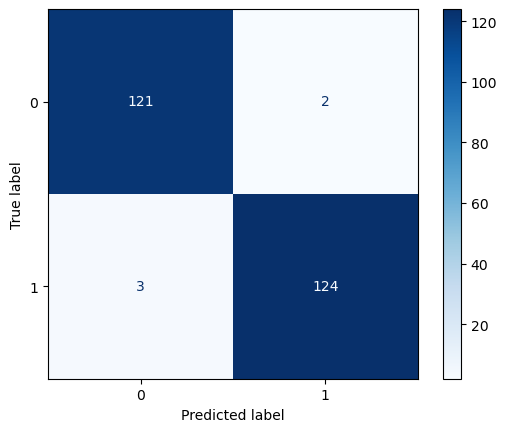

In [39]:
# Генерация выборки
N = 1000
x1, x2 = spirale_sampling(N, 20, 1.5)
x = np.concatenate((x1, x2))
y = np.concatenate((np.zeros(N // 2), np.ones(N // 2)))

# Разделение на обучающую и проверочную выборки
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Создание перцептрона
perceptron = Perceptron(np.size(x_train, 1), 0.01, 'sigmoid', 'theorem')

fit_check_metrics(perceptron, x_train, x_test, y_train, y_test)